# Machine Learning Models

1. Linear Models
    * Logistic Regression
    * Support Vector Machines
2. Non-linear models
    * Nearest neighbor rule.
    * Decision Trees.
3. Ensemble learning
    * Introduction to ensemble learning
    * Bagging and Random Forest

# 1.1 Logisitic Regression

Logistic Regression is a classification algorithm that is used to predict the probability of a categorical variable. It is one of the most simple supervised Machine Learning algorithm, and despite being called Logistic Regression is is a **classification method**. 

The model $p(X)$ is defined as follows:
$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} $$

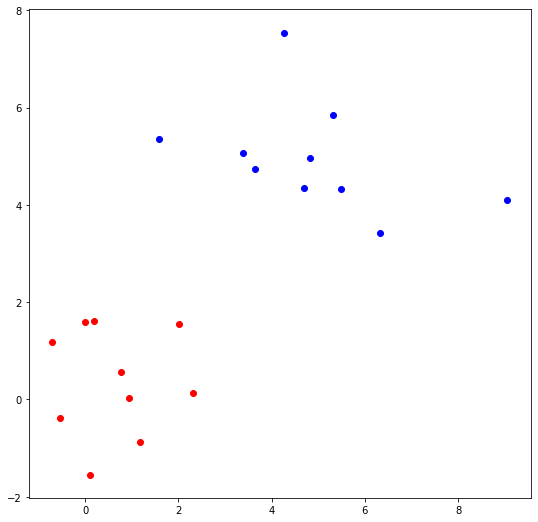

In [1]:
# Lets first ilustrate a simple problem with 2-dimensiona data.
from __future__ import division
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

MAXN=10
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

fig = plt.gcf()
fig.set_size_inches(9,9)

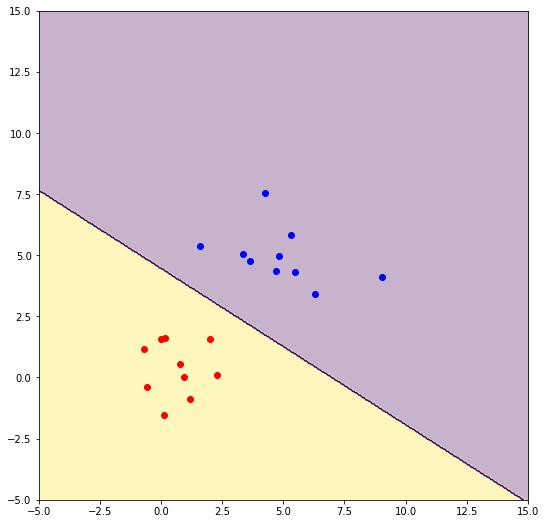

In [2]:
from sklearn.linear_model import LogisticRegression
#Let's see what the boundary looks like in a toy problem.

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

#Evaluate the model for a given weight
clf = LogisticRegression(solver= 'lbfgs')
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

# 1.2 Support Vector Machines
Support Vector Machines (SVM) is a prototypical example of discriminative learning. In this setting one explicitly assumes a function model class of the boundary. The classical model for SVM is a linear model. SVM is not the only discriminative linear model, e.g. perceptron, logistic classifier, etc. But, it is probably the most complete problem formulation.


<div class="alert alert-info"><b>INTUITION:</b> The Support Vector Machine classifer finds the boundary with maximum distance/<b>margin</b> to both classes.</div>

**Among all separating hyperplanes, find the one that makes the biggest gap or margin between the two classes.**

Observations:
- It implicitly models the notion of noise. One expects that the boundary with maximum margin will be robust to small perturbations in the data.
- A maximum margin classifier has a unique solution in the separable case.

Number of support vectors: 3
(w0,w1) = [-4.55177927 -4.63542679]
offset = 22.92345403473247


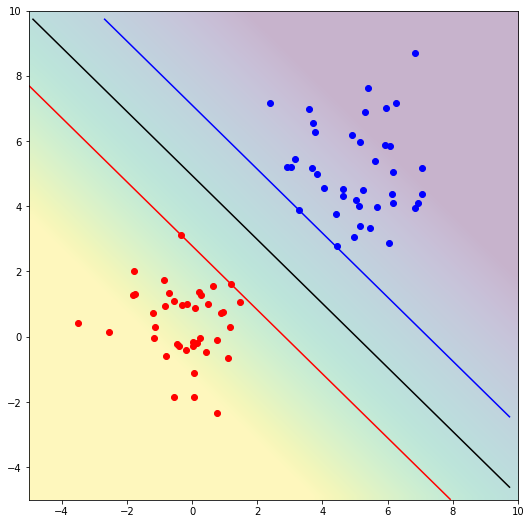

In [3]:
from sklearn import svm

class svm_example():
    def __init__(self, X, y, C = 1):
        '''Data creation'''
        np.random.seed(1)
        self.X = X
        self.y = y
        self.C = C

    def run(self):
        '''Fit a linear SVM'''
        self.clf = svm.SVC(kernel='linear',C = self.C)
        self.clf.fit(self.X,self.y.ravel())
        
    def display(self):
        '''Display stuff'''
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz=XX.shape
        data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
        Z=self.clf.decision_function(data)
        Z.shape=sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-3, vmax=3)
        XX = data[:,0].reshape(sz)
        YY = data[:,1].reshape(sz)
        plt.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        print ('Number of support vectors: ' + str(np.sum(self.clf.n_support_)))
        plt.scatter(self.clf.support_vectors_[:, 0], 
           self.clf.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
        print ('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print ('offset = ' + str(10*self.clf.intercept_[0]))
        return XX,YY,Z



X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
c = svm_example(X,y)
c.run()
XX,YY,Z=c.display()

Observe that there is a critical subset of data points. These are called Support Vectors. If any of those points disappear the boundary changes. The decision boundary depends on the support vectors, thus we have to store them in our model.


**Data is not that simple…** In most of the cases data is not separable,  and sometimes, the data is separable, but noisy.
The support vector classifier maximizes a **soft margin**. Parameter C determines how hard points violating the constraint should be penalized

$$ min_{\beta,\xi}\frac{1}{2}\|{\beta}\|^2 + \frac{C}{N} \sum_i\xi_i$$
$$ s.t. y_i({\beta}x_i)\ge 1-\xi_i , \xi \ge0, \forall i\in \{1,...,N\} $$

Observe that if $y_i({\beta}\cdot {x}_i)\ge 1$, then $\xi_i = 0$ and in this case there is no contribution to the penalty, but if the margin $y_i({\beta}\cdot {x}_i) < 1$, $\xi_i>0$ and the penalty term increases $\frac{C}{N}\xi_i$:
$$ \xi_j = max(0, 1 - y_i(\beta\cdot {x_i}))$$
which is know as **hinge loss**

Number of support vectors: 10
(w0,w1) = [-6.08979291 -8.66455832]
offset = 38.71028231532473


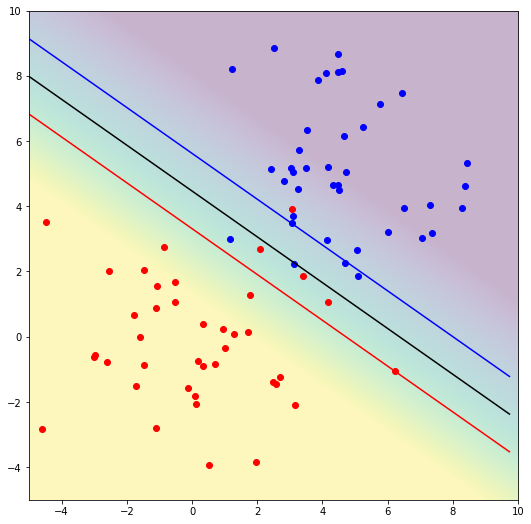

In [4]:
X = np.concatenate([2*np.random.randn(40,2),5+2*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
c = svm_example(X,y)
c.run()
XX,YY,Z=c.display()

Number of support vectors: 8
(w0,w1) = [-10.30038715 -13.01696024]
offset = 66.69683004003481


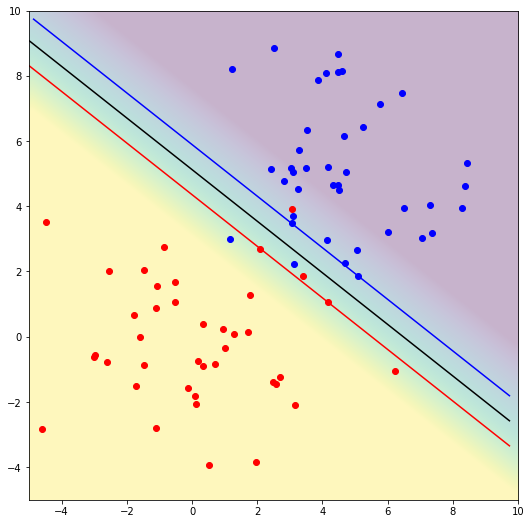

In [5]:
c = svm_example(X,y,C=10)
c.run()
XX,YY,Z=c.display()

# 2. Non-linear models in Machine Learning    
In our last case study, we shown that linear models can achive very good results. This is particularly true in datasets with large dimensionality. In those scenarios, the ratio between data and number of dimensions can be quite small. As a result we have a set of data spread out and it is very likely a linear model will be enough. However, it we have large amounts of data, this will not be enough. In those scenarios we may have to use non-linear models. 

In this notebook, we will introduce two concepts non-linearity and multi-class. Three models will be covered, Nearest Neighbors, Decision Trees and Kernel learning. We will apply these models to the predict **Customer Churn**. 

Let us first introduce the case study



# CASE STUDY: Customer Churn Analysis

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

The complete set of attributes is the following:

+ State: categorical, for the 50 states and the District of Columbia
+ Account length: integer-valued, how long an account has been active 
+ Area code: categorical
+ Phone number: customer ID
+ International Plan: binary feature, yes or no
+ VoiceMail Plan: binary feature, yes or no
+ Number of voice mail messages: integer-valued
+ Total day minutes: continuous, minutes customer used service during the day
+ Total day calls: integer-valued
+ Total day charge: continuous
+ Total evening minutes: continuous, minutes customer used service during the evening
+ Total evening calls: integer-valued
+ Total evening charge: continuous
+ Total night minutes: continuous, minutes customer used service during the night
+ Total night calls: integer-valued
+ Total night charge: continuous
+ Total international minutes: continuous, minutes customer used service to make international calls
+ Total international calls: integer-valued
+ Total international charge: continuous
+ Number of calls to customer service: integer-valued

In [6]:
churn_df = pd.read_csv('files/churn.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [7]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(np.float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


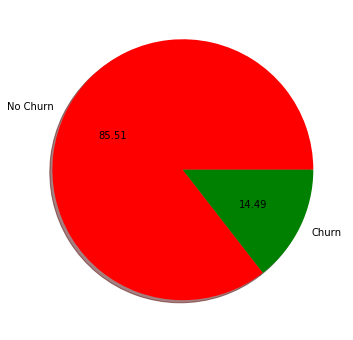

In [8]:
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [9]:
#Save data for future use.
import pickle
ofname = open('churn_data.pkl', 'wb')
s = pickle.dump([X,y,features],ofname)
ofname.close()

<div class = "alert alert-success">**QUESTION:** This kind of datasets are called **unbalanced** datasets. Name a trivial classifier with "good" accuracy in this data set?
</div>

<div class = "alert alert-info">
**Unbalanced datasets**
<p>
The unbalanced term describes the condition of the data where the ratio between the sizes of the positive and negative is a small value. In those scenarios, always predicting the majority class usually yields good accuracy performance, though it is ill informative. This kind of problems is very common when we want to model unusual events such as rare diseases, the occurrence of a failure in machinery, credit card fraud operations, etc. In those scenarios gathering data from usual events is very easy but collecting data from unusual events is difficult and results in a comparatively small size data set. In order to measure the performance on those data sets one has to use other performance metrics, such as specificity or positive predictive value on the minority class. In the end, the value of a misclassification of a sample depends on the application and the user. For example, in cancer detection because the cost of missing one patient in a trial is very large, we want the predictor to have very large sensitivity (we do not accept false negatives) though it means accepting more false positives. These false positives can be discarded in subsequent tests. 
</div>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

clf = LogisticRegression(random_state=0, solver='lbfgs')

acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    yhat[test_index] = clf.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))

Mean accuracy: 0.8547780163972067


/Users/ssegui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ssegui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ssegui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ssegui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ssegui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

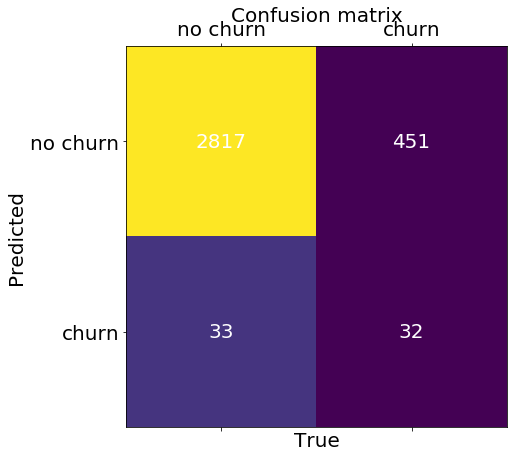

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2850
           1       0.49      0.07      0.12       483

    accuracy                           0.85      3333
   macro avg       0.68      0.53      0.52      3333
weighted avg       0.81      0.85      0.80      3333



In [11]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
    
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

# 2.1. Nearest Neighbors

Nearest neighbors is a member of the instance based learning and lazy Learning families. Instance based models base the model on the evaluation of a function that depends on the point we are querying and training data. Nearest Neighbors is the **simplest** of these techniques. The rationale behind this model is as follows: Each training data set can be seen as a solved case/problem. Thus, given a new problem instance we may retrieve the most *similar* case in our data set and apply the same solution. In the case of classification, this means that we select the label of the most similar data example in our training set.

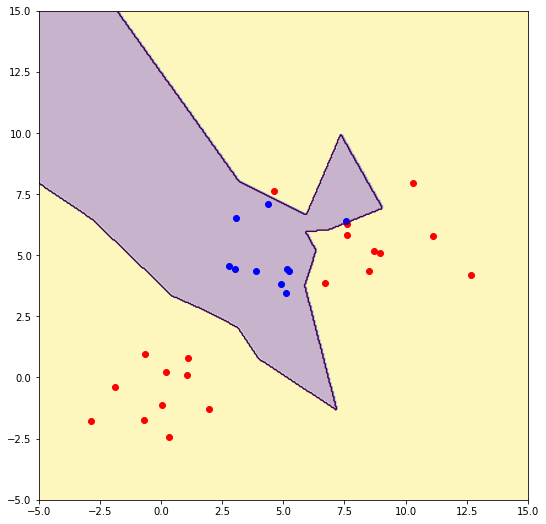

In [12]:
#Let's see what the boundary looks like in a toy problem.
from sklearn import neighbors

MAXN=10
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')


delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

#Evaluate the model for a given weight
clf = neighbors.KNeighborsClassifier(1)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

Observations:

+ The boundary is piece-wise linear. It is composed of edges of the Voronoi diagram.
+ Observe that the classifier perfectly fits the training data. Adding or removing one data point can largely change the boundary. This implies that the complexity of the method is large.
+ The key component of the nearest neigbors classifier is the notion of similarity/distance.

Remember that regularization explicitly models complexity. Regularization is usually a penalty term. In nearest neighbors we can penalize solutions with small "support" by using a majority voting on the $k$ closests data samples to the query sample.

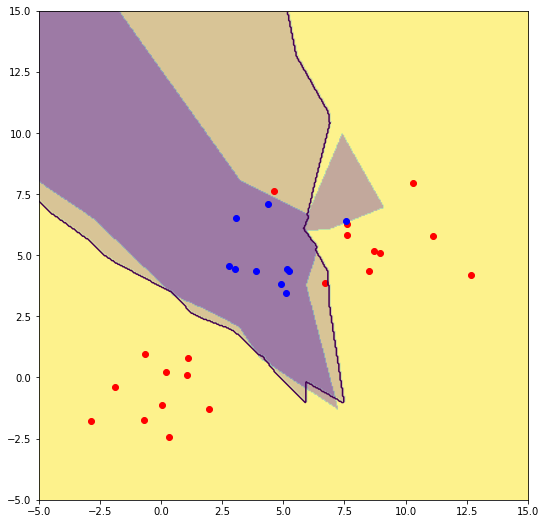

In [13]:
#Let's see what the boundary looks like in a toy problem.

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y.ravel())
Z2=clf.predict(data)
Z2.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.4, vmin=-1, vmax=1)
plt.imshow(Z2, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.2, vmin=-1, vmax=1)

plt.contour(XX,YY,Z2,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

## 2.1.1 Churn classification with nearest neighbors.

So let us head back to analyzing the problem of customer churn prediction. We may fit a 1-Nearest Neighbor classifier and check the result.

In [14]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
print ('Loading ok.')

Loading ok.


In [15]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)


acc = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train,y_train)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.8589844717280999


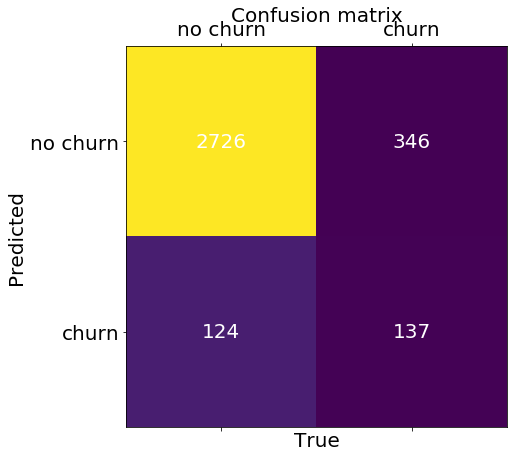

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2850
           1       0.52      0.28      0.37       483

    accuracy                           0.86      3333
   macro avg       0.71      0.62      0.64      3333
weighted avg       0.83      0.86      0.84      3333



In [16]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

This is quite a bad result. Remember that by always selecting class 'no churn' we should get around  85%  of accuracy. As it was noticed before the definition of distance is critical. In NN we are using Euclidean distance. Distances assume that all variables operate at the same scale, i.e. all are commensurable. A change in one unit in one of the variables is equivalent to/as important as a change of 1 unit in the other. In this data set, this does not happen. For example, area codes values are around 400 while whether the customer enjoys an international plan take values 0 and 1. Thus, we may account for these changes by scaling the features. The most standard way of doing this is feature normalization or standarization. In this preprocessing technique each feature is scaled to have zero mean and unit standard deviation.

In [17]:
# Standarize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
clf = neighbors.KNeighborsClassifier(1)

acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train,y_train)
    yhat[test_index] = clf.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))

Mean accuracy: 0.86468927698313


<div class = "alert alert-warning"> **QUESTION:** In the former process we have accidentally snooped into the data and the result is contaminated. Where?</div>


In [19]:
clf = neighbors.KNeighborsClassifier(1)

#NO SNOOPING
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    clf.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.864388526457492


[Text(0, 0, 'snooping'), Text(0, 0, 'no snooping')]

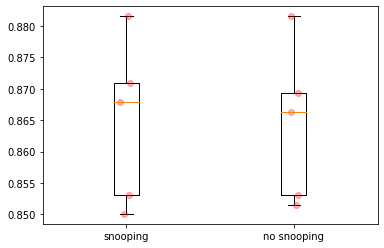

In [20]:
acct=np.c_[acc_snooping,acc]
plt.boxplot(acct);
for i in range(2):
    xderiv = (i+1)*np.ones(acct[:,i].shape)+(np.random.rand(5,)-0.5)*0.1
    plt.plot(xderiv,acct[:,i],'ro',alpha=0.3)
ax = plt.gca()
ax.set_xticklabels(['snooping', 'no snooping'])

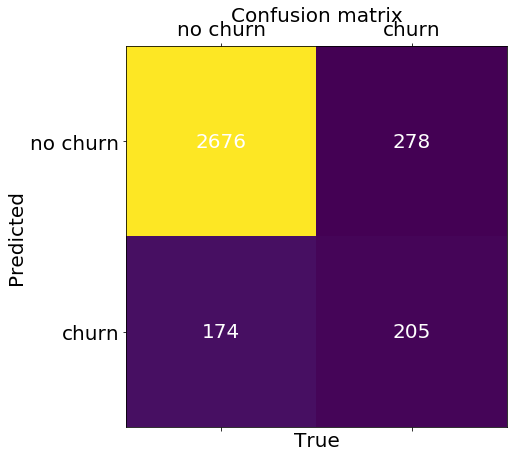

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2850
           1       0.54      0.42      0.48       483

    accuracy                           0.86      3333
   macro avg       0.72      0.68      0.70      3333
weighted avg       0.85      0.86      0.86      3333



In [21]:
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

## 2.1.1.1 A brief description of the confusion matrix

This result is much better. As we have seen accuracy can be a little informative in some problems. For this reason we may use other performance measures. Classic performance measures can be derived from the confusion matrix. Consider the following confusion matrix:

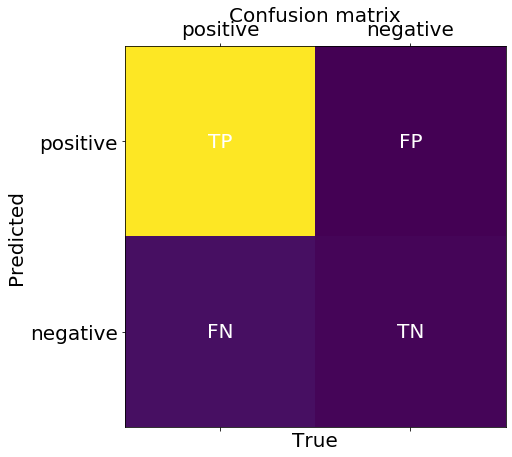

In [22]:
def draw_confusion_b(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    ax.text(0, 0, 'TP', va='center', ha='center',color='white',size=20)
    ax.text(0, 1, 'FN', va='center', ha='center',color='white',size=20)
    ax.text(1, 0, 'FP', va='center', ha='center',color='white',size=20)
    ax.text(1, 1, 'TN', va='center', ha='center',color='white',size=20)            
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion_b(y,yhat,['positive', 'negative'])

The matrix is divided in four quarters and contains

+ True Positives (TP): Positive samples predicted as such.
+ True Negatives (TN): Negative samples predicted as such.
+ False Positives (FP): Negative samples predicted as positive.
+ False Negatives (FN): Positive samples predicted as negative.

The combination of these elements allows to define several performance metrics:

+ Accuracy: 

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

Column-wise we find these two partial performance metrics:

+ Sensitivity or Recall: 

$$\text{sensitivity}=\frac{\text{TP}}{\text{Real Positives}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Specificity:

$$\text{specificity}=\frac{\text{TN}}{\text{Real Negatives}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

Row-wise we find these two partial performance metrics:

+ Precision or Positive Predictive Value:

$$\text{precision}=\frac{\text{TP}}{\text{Predicted Positives}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Negative predictive value:

$$\text{NPV}=\frac{\text{TN}}{\text{Predicted Negative}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$

The concept of positive and negative samples is purely arbitrary, thus we really have to remember the concepts of precision/positive predictive value and sensitivity/recall. 

In [23]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))

TP: 205
TN: 2676
FP: 174
FN: 278
sensitivity/recall: 0.4244306418219462
precision: 0.5408970976253298


### 2.1.1.2 Analyzing the confusion matrix in our problem

Our goal is to predict custormer churn, thus we may ask how often the classifier correctly predicts it. We will consider "churn" as the positive class. The question we are wondering about is the ratio between the $TP$ and all the $\text{Real Positives}$. This is the *sensitivity* or *recall*. We are able to correctly predict $187/(187+296) = 0.39$ of the customers that cease the service. Observe that this value is consistent with the classification report when checking recall for class $1$.

However, we have to trade-off this value with *precision*. Precision answers the question, from all the customers we predict will churn, which is the ratio of those that actually churn? This effectively tells us the price we are paying in terms of how many non-churn customers are being predicted as quitters. If we check this value, we can see it is $187/(187+59) = 76\%$. This means that about 1 out 4 customers predicted as churn are not quitting the service.

<div class="alert alert-info"> **Nearest Neighbors**
<p>
<ul>
<li> One of the simplest classifiers.
<li> Smoothness of the model is governed by the number of the neighbors.
<li> Hyper-parameter $k$ or $p$ in the $\ell_p$ norm are set by cross-validation.
</ul>
</div>

# 2.2. Decision trees

Decision trees are another kind of intutive classification strategy based on the divide and conquer paradigm. 

The basic **idea** in decision trees is to partition the space in patches and fit a model in that patch. There are two questions to answer in order to implement this solution:

+ How do we partition the space?
+ What model to use in each patch?

In classification trees the second question is straight forward, each patch is given the value of a label and all data falling in that part of the space will be predicted as such.

## 2.2.1 Decision tree modeling

Elements:

- Splits using axis-orthogonal hyperplanes. This is the key that allows interpretability of the results.

- At each internal node we test a value of a feature. A feature and a threshold are stored for each internal node.  

- Leaves makes the class prediction. If leaves are pure, we have to store the class label. If leaves are impure, then the fraction of samples for each class is stored and its frequency is returned when queried.


### 2.2.1.1 Building our intuition on decision trees

Let us build up our intuition with a simple example.

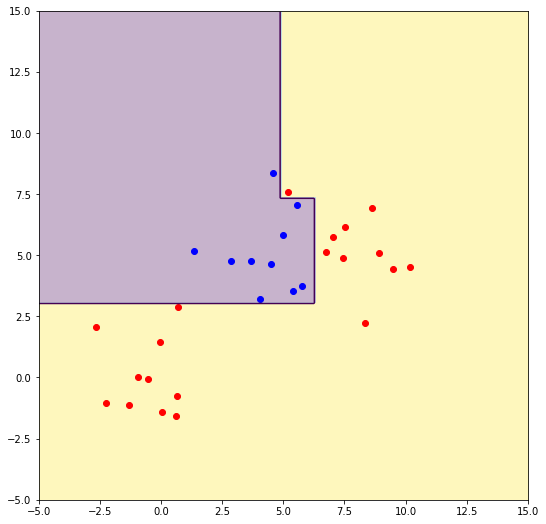

In [24]:
%matplotlib inline
#Let's see what the boundary looks like in a toy problem.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')



delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

In [25]:
#Export Tree
import os
dotfile = tree.export_graphviz(clf, out_file = "toy_tree.dot")

os.system("dot -Tpng toy_tree.dot -o toy_tree.png")

0

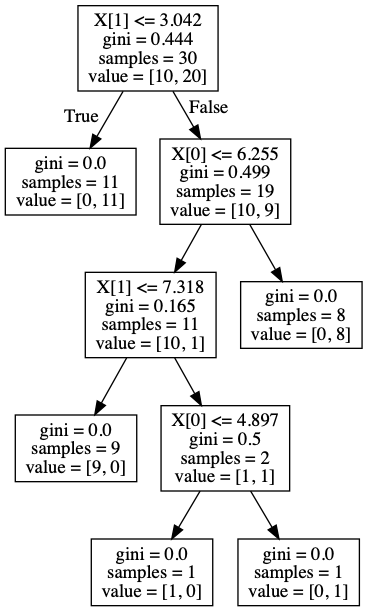

In [26]:
from IPython.core.display import Image
Image("toy_tree.png")

Let us check the meaning of the tree. The first node splits the training set using feature $1$ by applying the threshold $\leq 3.04$. As a result we are able to correctly classify eleven of the thirty data points. Let us see the boundary in that case.

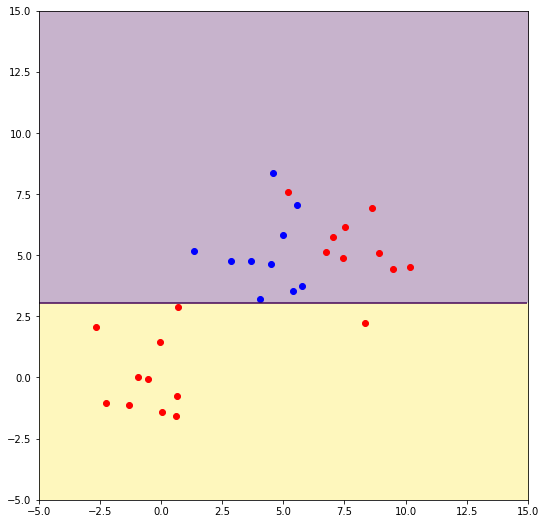

In [27]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')


plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

The second node splits the training set using feature $0$ by applying the threshold $\leq 6.25$. Note that this only is used in the part of the space where feature $1$ is greater  than $3.04$. Observe that the remaining blue space is characterized by the following logical function: $(x_1>3.04) \wedge (x_0\leq 6.25)$

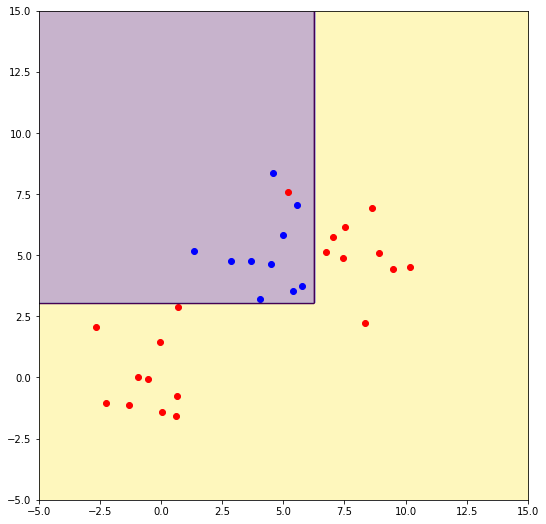

In [28]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

What is great about decision trees?

+ Trees are easy for humans to interpret. It can be seen as a set of rules. Each path from root to one leaf of the tree is an AND combination of the thresholded features.
+ Given a finite data set, decision trees can express any function of the input attributes. In ${\bf R}^d$ we can isolate every point in the data set by constructing a box around each of them.
+ There can be more than one tree that fits the same data. From all of them we would like a tree with minimum number of nodes. But the problem is NP.

### 2.2.1.2 Learning the tree

Because the problem is NP we can resort to a greedy construction algorithm. Greedy algorithms choose the current best binary partition without taking into account its impact on the quality of subsequent splits.

The algorithm idea is as follows:

+ Initialize the algorithm with a node associated to the full data set. 

**while** the list is not empty
1. Retrieve the first node from the list.
2. Find the data associated to that node.
3. Find a splitting point.
4. If the node is splittable, create the nodes linked to the parent node and put them in the exploration list.

#### The splitting criterion

There are many different splitting criteria. The most common ones are:

+ Misclassification error
+ Gini index
+ Cross-entropy/Information gain/Mutual information

Withouth going into details, misclassification error splits greedily select the split that corrects more data at each point. Gini index and cross-entropy probabilistically model the notion of impurity of a node. The split is chosen so that the average purity of the new nodes is maximized. Observe that as we descend in the tree the purity increases and eventually converge to pure leaves. Entropy measures the average surprise/information a probabilistic result yields. In a binary variable, the maximum surprise occurs when both outcomes are equally probable, one has the maximum uncertainty on the result. Otherwise, the surprise decreases. This behavior is also display in Gini's index.

### 2.2.1.3 Trees and overfitting

Because trees are very expressive models they can model any training set perfectly and easily overfit.

There are two ways of avoiding overfitting in trees:

+ Stop growing the tree when the split is not statistically significant.
+ Grow a full tree and post-prune.

One of the simplest ways of post pruning is "reduced error prunning". It goes like this,

1. Split data into training and validation
2. Create a candidate tree on the training set
3. Do until further pruning is harmful
    1. Evaluate impact on the validation set of removing each posible node (with descendants)
    2. Greedily remove the node that improves the performance the most.
    
Pruning is not implemented in sklearn at this moment. However let us check what happens in our customer churn prediction problem when we use a decision tree.

In [29]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Loading ok.')

Loading ok.


In [30]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(criterion='entropy')

kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits()
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    
    clf.fit(X_train,y_train)
    #X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9162950056503281


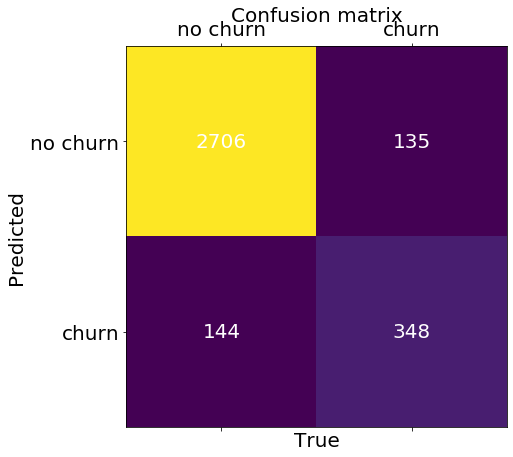

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2850
           1       0.71      0.72      0.71       483

    accuracy                           0.92      3333
   macro avg       0.83      0.83      0.83      3333
weighted avg       0.92      0.92      0.92      3333



In [31]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

In [32]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))

TP: 348
TN: 2706
FP: 144
FN: 135
sensitivity/recall: 0.7204968944099379
precision: 0.7073170731707317


Observe that by using a decision tree, the recall increased by $30\%$ while having the precision at a simliar level than nearest neighbors. Let us check the first levels of the tree.

In [33]:
import os
#Let us check the the first three levels of the tree. GraphViz and PyDot are needed.
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X,y)

#Export Tree

dotfile = tree.export_graphviz(dt, out_file = "churn.dot", feature_names = features)


os.system("dot -Tpng churn.dot -o churn.png")

0

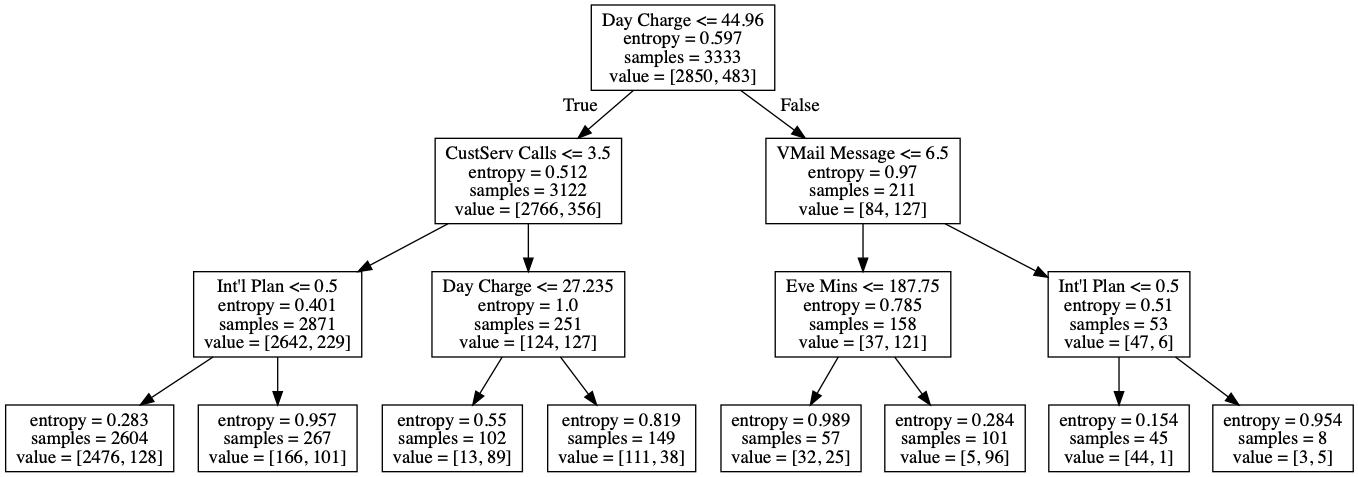

In [34]:
from IPython.core.display import Image
Image("churn.png")

Observe the first feature split and the values of the entropy according to the split.

In [35]:
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

#Let us check the entropy on the root node
#There are 2850 samples of customers that stay in the company. The frequency is
proot = 2850/3333
#And the entropy value is
print( 'Root node entropy: '+ str(entropy([proot,1-proot])))

#After the split we have the following frequencies for the left and right children
pleft = np.sum([2476,166,13,111])/3122 #Frequency of label 0 on the left node
pright = np.sum([32,5,44,3])/211 #Frequency of label 0 on the right node

print( 'Left node entropy: '+ str(entropy([pleft,1-pleft])))
print ('Right node entropy: '+ str(entropy([pright,1-pright])))

#Information gain computes the difference between the entropy of the parent and the weighed entropies of the children
# I = H_root - \sum freq_i * H_i

I = entropy([proot,1-proot]) - 3122/3333*entropy([pleft,1-pleft])+211/3333*entropy([pright,1-pright])

print ('Information gain: '+ str(I))



Root node entropy: 0.5969661117996699
Left node entropy: 0.5119516728279073
Right node entropy: 0.9698308534774178
Information gain: 0.1788206535083433


The split reduces the average entropy of the children, thus the splits are more pure.

Observations:

+ Observe that because we have restricted (for visualization purposes) the maximum depth of the tree, the leaves are not pure. 
+ Analyzing the leaves we can see that most of the clients that are hooked to the plan share the following conditions:

$$(\text{Day Charge} \leq 1.5) \wedge (\text{Customer Service Calls} \leq 1.47) \wedge (\text{International Plan} \leq 1.36)$$

Note that these values are preprocessed and as such they convey little interpretable information. Thus, in order to make sense of the former conditions we have to invert the transformation. We can do it in several ways, one way is to use interpolation and query for the feature of interest.

Thus the final profile for the 2476 customers that do not churn has in common:

$$(\text{Day Charge} \leq 45) \wedge (\text{Customer Service Calls} < 4) \wedge (\text{International Plan}= \text{NO})$$

# 2.3. Kernel SVM

We have seen that a linear model in the parameters can model non-linear boundaries provided we **explicitly** map original data non-linearly. For example, we can create a linear model with features squared. This will lead to a quadratic boundary with respect to the original space. There is another way of **implicitly** encoding non-linearities by means of **kernels**.

The kernel encodes the notion of similarity between two data points. 

The change in the formulation involve the introduction of several concepts from mathematical analysis. For the sake of simplicity, we will skip the details (read "The story of a kernel" in the following paragraph or ask any detail if you are curious).

As a result, any regularized cost function optimization problem such as SVM has a solution of following form,

$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$


<div class = "alert alert-info"><b>The story of a kernel</b>
<p>
*Disclaimer: This is  a highly mathematically non rigorous story of how kernels come into play in machine learning.*
<p>
At some point we talked about keeping complexity in check. For that purpose we need to measure complexity. And we saw that certain models, such as linear models can control it using the norm of weights. To the fact of adding this penalty to the objective function we are optimizing is called <b>regularization</b>.
<p>
However, it would be great to be able to measure the complexity of any function. To address this issue we have to resort to functional analysis. Functional analysis is a brach of mathematical analyisis that deals with spaces of functions. For that purpose a Hilbert space must be introduced so that similarity and distance among functions can be measured. A Hilbert space is a complete vector space with inner product. Intuitively, it generalizes the classical Euclidean space to infinite dimensions, and thus, to functional spaces.
<p>
One particular functional space is the Reproducing Kernel Hilbert Space (RKHS). In this space a function evaluated on a point $x$ is defined by the inner product of the function and the kernel evaluated on that point, i.e. $f(x) = \langle f(\cdot),K(x,\cdot) \rangle$, where $K$ is the kernel. This is called Riesz representation and it is the key for showing the most important result for our problems, <b>The Representer's theorem</b>.
<p>
The Respresenter's theorem states that the solution of any problem with the following form 
$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2
	$$
is given by
$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$
where $x_i$ are our samples. 
</div>
    
    
The kernel has to be a positive semi-definite function, such as:

+ Linear kernel: $$k(x_i,x_j) = x_i^Tx_j$$
+ Polynomial kernel: $$k(x_i,x_j) = (1+ x_i^Tx_j)^p$$
+ Radial Basis Function kernel $$k(x_i,x_j) = e^{-\frac{\|x_i-x_j\|^2}{2\sigma^2}}$$


<div class = "alert alert-warning"> On a practical side you can define a kernel by using your favorite distance $d(x_i,x_j)$ and defining the kernel as
$$k(x_i,x_j) = e^{-\gamma d(x_i,x_j)}, \quad \gamma>0$$
where $\gamma$ is a hyper-parameter that controls the decay of the exponential (we will tune it using cross-validation). Observe that RBF is an instantiation of this more general rule.
</div>

As comented before, kernels implicitly encode a non-linear transformation and remember that SVM finds the optimal hyperplane. By combining both concepts we have a linear method applied on a data on a transformed space, but we do not have to provide the explicit transformation.

This becomes incredibly useful when one realizes that the feature mapping from a radial basis function kernel is a maping into a $\infty$-dimensional space.

Le us build our intuition about how kernels work with the following video:

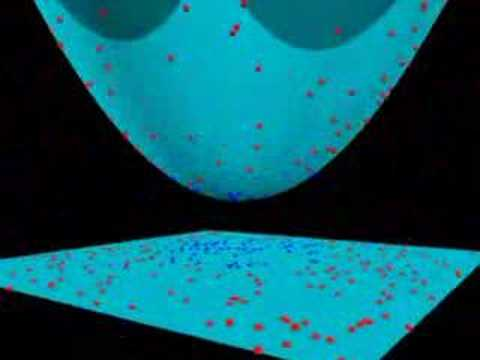

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', size=700)

Let us try it in a toy problem.

In [37]:
#Let's see what the boundary looks like in a toy problem.
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import svm
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

def SVC_gamma(gamma, C):
    clf = svm.SVC(kernel = 'rbf', gamma = gamma, C = C)
    clf.fit(X,y.ravel())
    Z=clf.decision_function(data)
    Z.shape=sz
    plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
    plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)

from IPython.html.widgets import interact    
interact(SVC_gamma, gamma=(0.011,5.,0.01), C = (0.01,2))

/Users/ssegui/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(FloatSlider(value=2.5010000000000003, description='gamma', max=5.0, min=0.011, step=0.01…

<function __main__.SVC_gamma(gamma, C)>

# 3. Ensemble Methods


When we want to purchase a product we usually read user's reviews. Before undergoing a major surjery procedure we seek the opinion of different experts. Ensemble learning mimicks one of the human uncertainty reduction mechanism, seeking additional opinions before making a major decision.

Ensemble learning is divided in two steps:

1. Train a set of classifiers
2. Aggregate their results

There are different reasons for using ensemble learning in practice:

1. **Statistical reasons:** The combination of outputs of different classifiers may reduce the risk of an unfortunate selection of a poorly performing classifier.
2. **Large scale data sets:** It makes little sense to only have one classifier on very large sets of data. Partition data in smaller subsets and aggregate seems like a good idea.
3. **Divide and conquer:** Some problems too difficult for a single classifier to solve. The decision boundary may be too complex or lie outside the space of functions of the classifier.
4. **Data fusion:** Different source fusion is usually a problem. One usually faces data coming from heterogeneous sources and the question is how to fuse these data. One solution is to train one classifier per source and the fuse the decision of those experts.

## Diversity

One condition required for the system to work is that errors on different classifiers should be made on different samples in order for the strategic combination of the classifiers to correct possible errors in the judgement of the class o a particular instance. This effect has been called **diversity**.

Diversity can be obtained in different ways:

+ Using different training sets. Use resampling strategies to obtain different optimal classifiers. This effect is correlated with the notion of stability of the classifier and the concept of bias and variance of the classifier.
+ Using different training parameters for different classifiers
+ Combining different architectures. (i.e. svm, decission trees, ...)
+ Training on different features. (i.e. random subspaces or random projections)


## 3.1 Bootstrapping aggregation 

Bootstrapping means resampling the training data set with replacement. Usually the same number of data as the original data set is used.

**Bootstrapping aggreagtion (aka. Bagging)** is a ensemble technique that uses multiple bootstrapped copies of the training set to build a set of classifiers. One classifier for each bootstrapped training copy. And then, use a combination technique, such as majority voting, in order to take the final decision.



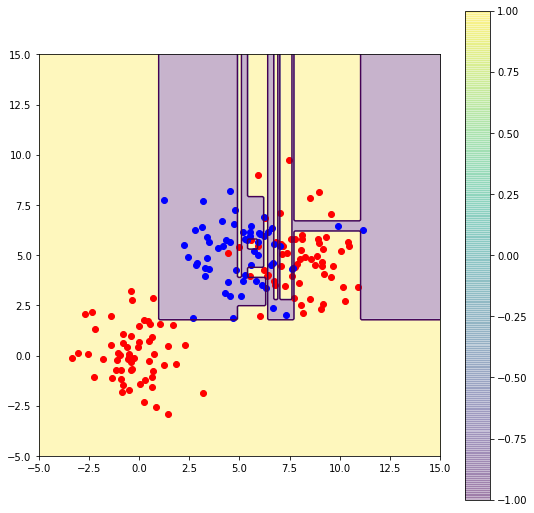

In [38]:
#Let us train an overfitted classifier. For example an SVC.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=60
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import tree
from sklearn import metrics

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]


clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X,y.ravel())
Z=clf.predict(data)
mx= np.max(Z)
mn= np.min(Z)
Z.shape=sz
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.colorbar()
plt.contour(XX,YY,Z,[0])

fig = plt.gcf()
fig.set_size_inches(9,9)


Process finnished.


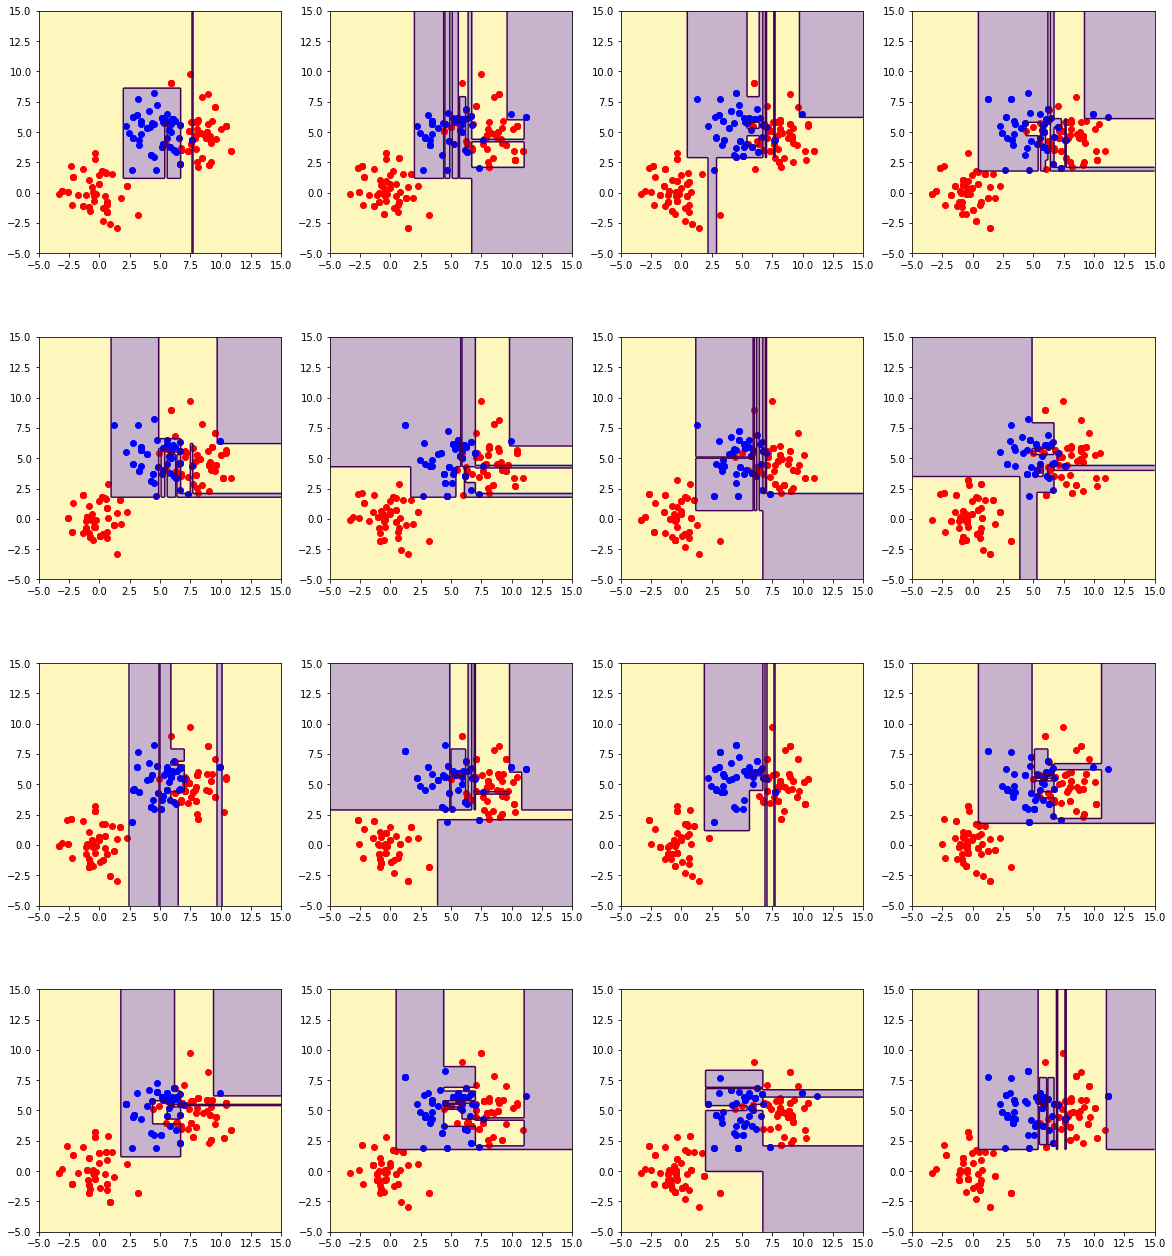

In [39]:
def train_bagged_tree(X,y,C):
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),idx))  #Add the indices for visualization purposes in test
    return clf_list


def visualize_bagged_tree(X,y,clf_list):
    C = len(clf_list)
    x = np.linspace(-5,15,200)
    XX,YY = np.meshgrid(x,x)
    sz=XX.shape
    data=np.c_[XX.ravel(),YY.ravel()]
    yhat=np.zeros((data.shape[0],len(clf_list)))
    i=0
    for dt,idx in clf_list:
        yhat[:,i]=dt.predict(data)
        Xr=X[idx,:]
        yr=y[idx]
        mx= np.max(yhat[:,i])
        mn= np.min(yhat[:,i])
        plt.subplot(int(np.floor(C/4))+1,4,i+1)
        plt.scatter(Xr[(yr==1).ravel(),0],Xr[(yr==1).ravel(),1],color='r')
        plt.scatter(Xr[(yr==-1).ravel(),0],Xr[(yr==-1).ravel(),1],color='b')
        plt.imshow(yhat[:,i].reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
        plt.contour(XX,YY,yhat[:,i].reshape(sz),[0])
        i=i+1
    fig = plt.gcf()
    fig.set_size_inches(20,7*int(np.floor(C/4))+1)
    return yhat


clf_list=train_bagged_tree(X,y,16)
y_pred=visualize_bagged_tree(X,y,clf_list)
y_pred = np.sum(y_pred,axis=1)

print ('Process finnished.')


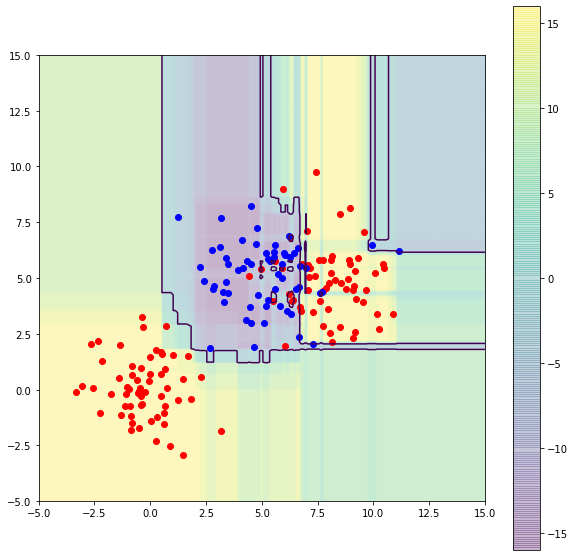

In [40]:
mx= np.max(y_pred)
mn= np.min(y_pred)
plt.figure()
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
plt.imshow(y_pred.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=mn, vmax=mx)
plt.colorbar()
plt.contour(XX,YY,y_pred.reshape(sz),[0])
fig = plt.gcf()
fig.set_size_inches(10,10) 

## 3.2 Random Forest

Random Forest technique introduces a randomization over the feature selected for building  each tree in the ensemble in order to improve diversity in an attempt to reduce variance evan more. Let us code this variant of bagging.

In [41]:
%reset -f
from sklearn import tree
import numpy as np
def train_random_forest(X,y,C,F):
    F=int(np.ceil(np.sqrt(X.shape[1])))
    clf_list=[]
    for i in range(C):
        np.random.seed(None)
        idx=np.random.randint(0,y.shape[0],y.shape[0])
        feat_idx=np.random.permutation(np.arange(X.shape[1]))[:F]
        clf = tree.DecisionTreeClassifier(criterion="entropy")
        Xr=X[idx,:].copy()
        Xr=Xr[:,feat_idx]
        yr=y[idx]
        clf_list.append((clf.fit(Xr,yr.ravel()),feat_idx))
    return clf_list


def test_random_forest(X,clf_list):
    yhat=np.zeros((X.shape[0],len(clf_list)))
    i=0
    for dt,feat_idx in clf_list:
        yhat[:,i]=dt.predict(X[:,feat_idx])
        i=i+1
    return np.sign(np.mean(yhat,axis=1)),yhat

In [42]:
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = 2*data[1]-1
print ('Labels: '+ str(np.unique(y)))
features = data[2]
print ('Loading ok.')

Labels: [-1  1]
Loading ok.


In [43]:
from sklearn import metrics
clf_list = train_random_forest(X,y,51,5)
yhat,yk = test_random_forest(X,clf_list)
acc = metrics.accuracy_score(yhat, y)
print (yk.shape)
print (np.sum(np.mean(yk,axis=1)>0))
print (acc)

(3333, 51)
482
0.9996999699969997


In [44]:
#NO SNOOPING
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False, random_state=0)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = ensemble.RandomForestClassifier(n_estimators=51)
    clf.fit(X_train,y_train)
    yhat[test_index]=clf.predict(X_test)
    
    #clf_list = train_random_forest(X_train,y_train,51,np.ceil(np.sqrt(X.shape[1])))
    #yhat[test_index],yk = test_random_forest(X_test,clf_list)
    
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print (acc)
print (np.unique(yhat))
print (np.unique(y_test))
print ('Mean accuracy: '+ str(np.mean(acc)))

[0.94752624 0.95802099 0.95502249 0.95645646 0.95045045]
[-1  1]
[-1  1]
Mean accuracy: 0.9534953244098672


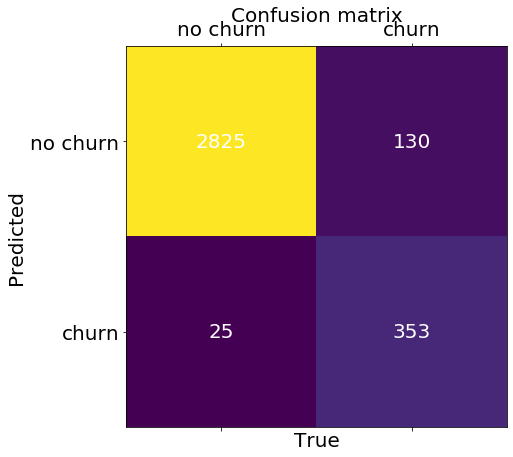

              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      2850
           1       0.93      0.73      0.82       483

    accuracy                           0.95      3333
   macro avg       0.94      0.86      0.90      3333
weighted avg       0.95      0.95      0.95      3333



In [45]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()
draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))